In [1]:
import pandas as pd 
input = './stbl/REMBRANDTS_stbl.txt'
data = pd.read_table(input, index_col=0)

In [21]:
[c.split('_') for c in sorted(data.columns.tolist())]


[['hl60', '120h', 't'],
 ['hl60', '120h', 'u'],
 ['hl60', '6h', 't'],
 ['hl60', '6h', 'u'],
 ['hl60', '72h', 't'],
 ['hl60', '72h', 'u'],
 ['kg1', 't'],
 ['kg1', 'u'],
 ['molm14', 't'],
 ['molm14', 'u'],
 ['ociaml2', 't'],
 ['ociaml2', 'u'],
 ['ociaml3', 't'],
 ['ociaml3', 'u'],
 ['thp1', 't'],
 ['thp1', 'u']]

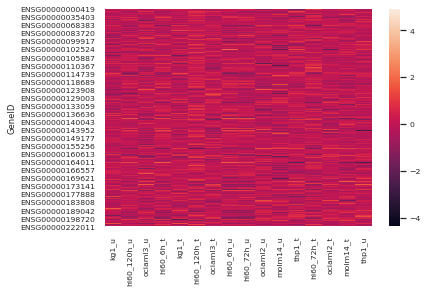

In [27]:
ax = sns.heatmap(data)

In [66]:
import os
if not os.path.exists('./results'):
    os.mkdir('results')
if not os.path.exists('./results/plots'):
    os.mkdir('results/plots')

# Differential Expression with Limma

In [8]:
library(edgeR)
library(Biobase)

       u_vs_t
Down        0
NotSig   9706
Up          0


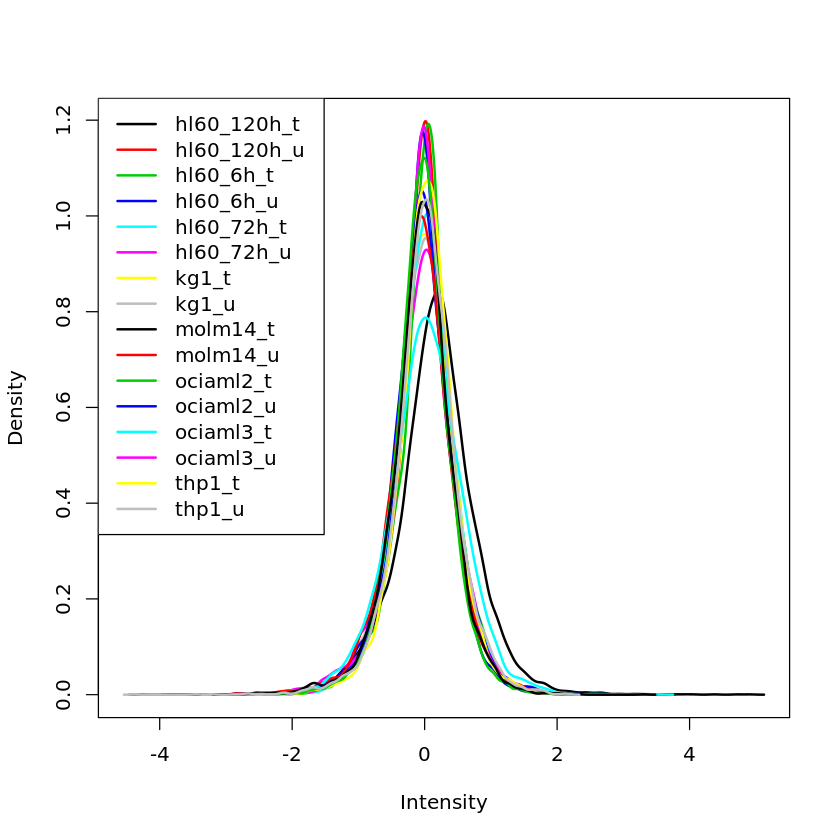

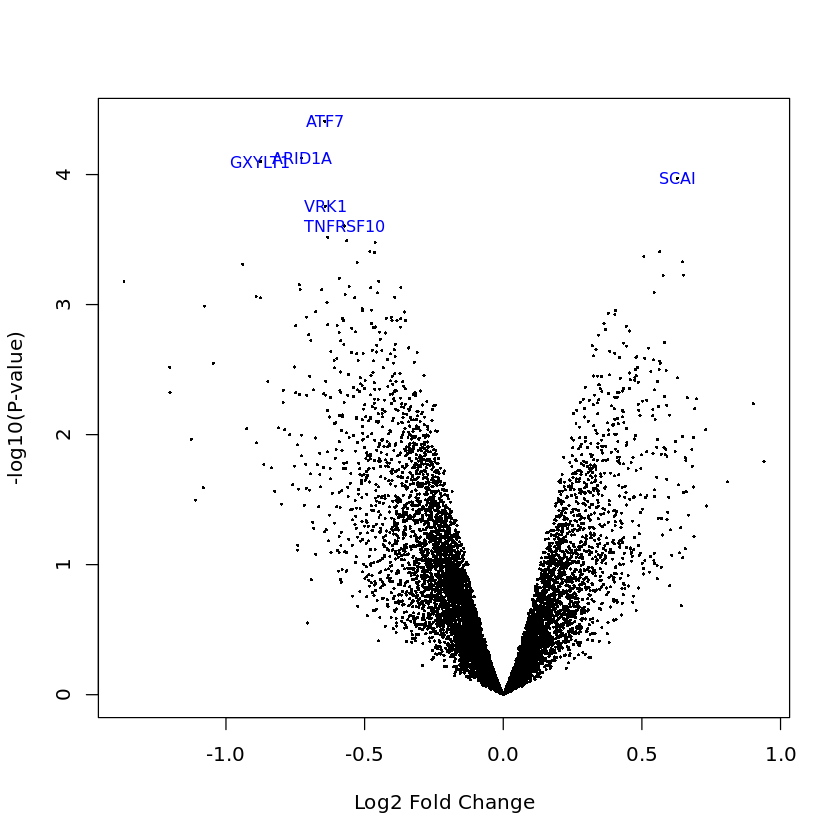

In [9]:
counts <- read.delim("stbl/REMBRANDTS_stbl.txt", row.names = 1)
snames <- colnames(counts) # Actual sample names
cellline <- substr(snames, 1, nchar(snames) - 2) # cell lines 
stype <- substr(snames, nchar(snames), nchar(snames)) # u | t 

# add gene names to the expression objects 
id_transfer <- read.delim(
    "../../Workflows/RNA-seq/data/id_transfer/hg38/EnsemblIDtoGeneName.txt",
    row.names = 1)
f = data.frame(Gene_name = id_transfer[row.names(counts),], 
               row.names = row.names(counts))

p = data.frame(Cellline=cellline, Type=stype, row.names=snames)
eseq <- ExpressionSet(
    assayData = as.matrix(counts),
    phenoData = AnnotatedDataFrame(p),
    featureData = AnnotatedDataFrame(f)
)
design <- model.matrix(~0 + Type + Cellline, pData(eseq))
cm = makeContrasts(u_vs_t = Typeu - Typet, levels = design)
### fit limma 
# Fit coefficients 
fit <- lmFit(eseq, design)
# Fit contrasts 
fit2 <- contrasts.fit(fit, contrasts = cm)
# Calculate t-statistics 
fit2 <- eBayes(fit2)
# Summarize results 
results <- decideTests(fit2)
print (summary (results))

plotDensities(eseq)
volcanoplot(fit2,highlight = 6, names = fit2$genes[,'Gene_name'])

In [ ]:
# for (u in unique(cellline)){
# w = which(cellline==u)
# p = data.frame(Cellline=cellline[w], Type=stype[w], row.names=snames[w])
# eseq <- ExpressionSet(
#     assayData = as.matrix(counts[,w]),
#     phenoData = AnnotatedDataFrame(p),
#     featureData = AnnotatedDataFrame(f)
# )
# }

In [120]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/RADAR/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] Biobase_2.46.0      BiocGenerics_0.32.0 edgeR_3.28.0       
[4] limma_3.42.0       

loaded via a namespace (and not attached):
 [1] locfit_1.5-9.1  Rcpp_1.0.3      lattice_0.20-38 digest_0.6.23  
 [5] crayon_1.3.4    IRdisplay_0.7.0 grid_3.6.2      repr_0.19.2    
 [9] jsonlite_1